# INPE Downloader

## Initialization

To create a `Downloader` instance, we need to pass the FTP URL and the Parsers we want to work with. All INPE parsers are combined in a list called `INPEParsers.parsers`

In [2]:
%load_ext autoreload
%autoreload 2
import logging
from raindownloader.downloader import Downloader
from raindownloader.inpeparser import INPEParsers, INPETypes

In [3]:
import xarray as xr

In [4]:
[parser.datatype.name for parser in INPEParsers.parsers]

['DAILY_RAIN',
 'MONTHLY_ACCUM_YEARLY',
 'DAILY_AVERAGE',
 'MONTHLY_ACCUM',
 'MONTHLY_ACCUM_MANUAL',
 'YEARLY_ACCUM']

In [5]:
# Create a downloader instance
downloader = Downloader(server=INPEParsers.FTPurl, parsers=INPEParsers.parsers, local_folder='../tmp', 
                        log_level=logging.DEBUG)

In [13]:
ncfile = downloader.get_file('20230501', INPETypes.MONTHLY_ACCUM_MANUAL)
ncfile

PosixPath('../tmp/MONTHLY_ACCUM_MANUAL/MERGE_CPTEC_acum_may_2023.nc')

In [8]:
dset = xr.open_dataset(ncfile)
dset

<xarray.Dataset>
Dimensions:      (latitude: 924, longitude: 1001, time: 1)
Coordinates:
    step         timedelta64[ns] ...
    surface      float64 ...
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2023-04-01T12:00:00
Data variables:
    monthacum    (time, latitude, longitude) float32 ...
Attributes:
    updated:   2023-05-16 17:44:08.778573
    last_day:  20230430
    days:      30

In [9]:
dset.close()

In [52]:
updated = DateProcessor.parse_date(dset.attrs['updated'])

In [53]:
updated

datetime.datetime(2023, 5, 16, 14, 20, 24, 315912)

In [54]:
now = datetime.now()

In [56]:
delta = now - updated

In [62]:
delta

datetime.timedelta(seconds=943, microseconds=550416)

In [64]:
delta.

datetime.timedelta(days=-999999999)

In [65]:
delta.total_seconds() / 60

[autoreload of raindownloader.inpeparser failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.10/dist-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/workspaces/INPERainDownloader/raindownloader/inpeparser.py", line 279
    else:
IndentationError: expected an indented block after 'else' statement on line 

15.725840266666667

In [9]:
accum_manual = downloader.open_file('20230415', INPETypes.MONTHLY_ACCUM_MANUAL)

In [13]:
dset = xr.open_dataset(ncfile)

In [14]:
dset

<xarray.Dataset>
Dimensions:      (latitude: 924, longitude: 1001, time: 1)
Coordinates:
    step         timedelta64[ns] ...
    surface      float64 ...
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2023-04-01T12:00:00
Data variables:
    monthacum    (time, latitude, longitude) float32 ...

In [23]:
from datetime import datetime

In [27]:
dt = datetime.now()

In [44]:
dt

datetime.datetime(2023, 5, 16, 13, 58, 29, 641852)

In [28]:
str(dt)

'2023-05-16 13:58:29.641852'

In [29]:
dset.attrs['update_date'] = str(datetime.now())

In [32]:
dset.to_netcdf('teste.nc')

In [34]:
dset = xr.open_dataset('teste.nc')
dset

<xarray.Dataset>
Dimensions:      (latitude: 924, longitude: 1001, time: 1)
Coordinates:
    step         timedelta64[ns] ...
    surface      float64 ...
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2023-04-01T12:00:00
Data variables:
    monthacum    (time, latitude, longitude) float32 ...
Attributes:
    update_date:  2023-05-16 13:58:54.734353

In [36]:
dset.attrs['update_date']

'2023-05-16 13:58:54.734353'

In [37]:
from raindownloader.utils import DateProcessor

In [38]:
DateProcessor.parse_date(dset.attrs['update_date'])

datetime.datetime(2023, 5, 16, 13, 58, 54, 734353)

In [10]:
accum_manual

<xarray.DataArray 'monthacum' (time: 1, latitude: 924, longitude: 1001)>
[924924 values with dtype=float32]
Coordinates:
    step         timedelta64[ns] ...
    surface      float64 ...
  * latitude     (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude    (longitude) float64 -120.1 -120.0 -119.9 ... -20.15 -20.05
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2023-04-01T12:00:00

## Download a single file

To download a single file, we can simply pass the date in any format that dateutil can parse.<br>
For example: 'yyyy-mm-dd', 'yyyymmdd', 'yyyy/mm/dd', etc.<br>

Additionally, we pass the Data Type we want the the output folder.

In [4]:
# download the rain of 1st of March 2023
file = downloader.download_file('2023-03-01', datatype=INPETypes.DAILY_RAIN)
assert file.exists()

file

PosixPath('../tmp/DAILY_RAIN/MERGE_CPTEC_20230301.grib2')

<b>NOTE 1: </b> A file structure is automatically created within the specified local folder (`local_folder`). 

<b>NOTE 2: </b> One should keep in mind that the rain from 9:00am from 2023/03/01 to 9:00 from 2023/03/02 is saved as 20030302 but it is actually the amount of rain in 20230301.


### `get_file`


Instead of `download_file` we can also use the most general function `get_file`. In this case, before downloading, we check if the file exists and if it is exactly the same (size and modified dates). If the file is the same we don't download it again, unless `force` is set to True. As this checking takes time, an attribute of the downloader called `avoid_update` can be set to `True` to bypass this check.

In [5]:
file = downloader.get_file('2023-03-01', datatype=INPETypes.DAILY_RAIN)
file

PosixPath('../tmp/DAILY_RAIN/MERGE_CPTEC_20230301.grib2')

## Download a range

Similar to get a file, we can download a range by passing start and end dates...


In [5]:
files = downloader.get_range(
    start_date='20230301', 
    end_date='20230305', 
    datatype=INPETypes.DAILY_RAIN,
    force_download=False
)

# assert files exist
for file in files:
    assert file.exists()

# list the files
files

[PosixPath('../tmp/DAILY_RAIN/MERGE_CPTEC_20230301.grib2'),
 PosixPath('../tmp/DAILY_RAIN/MERGE_CPTEC_20230302.grib2'),
 PosixPath('../tmp/DAILY_RAIN/MERGE_CPTEC_20230303.grib2'),
 PosixPath('../tmp/DAILY_RAIN/MERGE_CPTEC_20230304.grib2'),
 PosixPath('../tmp/DAILY_RAIN/MERGE_CPTEC_20230305.grib2')]

## Post Processing

INPE files comes in different formats, projections, etc. To make things easier for further analysis, we can put them in the same CRS at the time of opening. For that, we use `post_processors`. These are functions that are applied when opening the files to make them conform with each other. 

These processors receive and return XArray Datasets. To check how the `.grib2` post processor looks like, let's take a look at its code. 

In [6]:
from raindownloader.inpeparser import INPE
INPE.grib2_post_proc??

Signature: INPE.grib2_post_proc(dset: xarray.core.dataset.Dataset) -> xarray.core.dataset.Dataset
Source:   
    @staticmethod
    def grib2_post_proc(dset: xr.Dataset) -> xr.Dataset:
        """Adjust the longitude in INPE's grib2 files and sets the CRS"""

        dset = dset.assign_coords({"longitude": dset.longitude - 360})
        dset = dset.rio.write_crs("epsg:4326")
        return dset
File:      /workspaces/INPERainDownloader/raindownloader/inpeparser.py
Type:      function

In [8]:
# create a downloader with post processing
downloader = Downloader(
    server=INPEParsers.FTPurl, 
    parsers=INPEParsers.parsers,
    local_folder='../tmp',
    post_processors=INPEParsers.post_processors
)


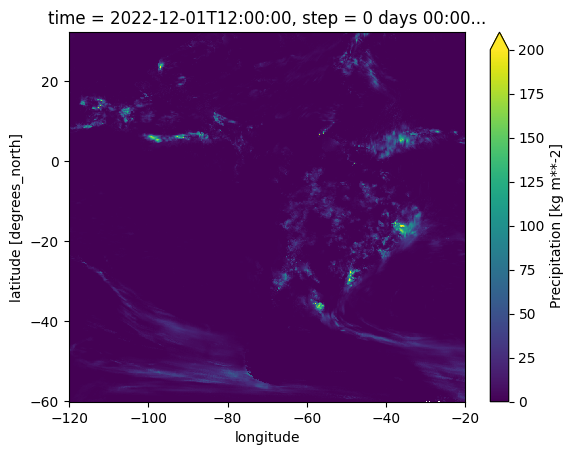

In [9]:
# get the rain of a specific date
rain = downloader.open_file('20221201', datatype=INPETypes.DAILY_RAIN)

# plot the array
rain.plot(vmax=200)

### Type-specific Post Processor

Additionally, data types can also have specific post processors, that goes into the Parser. for example, for Yearly Accumulated, the Parser has a post processor to correct the date. To make sure you are opening a file with the processors applied, make sure to open the files using the `.open_file()` method.

In [11]:
downloader.get_parser(INPETypes.YEARLY_ACCUM).post_proc

<function raindownloader.inpeparser.INPE.yearly_post_proc(dset: xarray.core.dataset.Dataset, date_str, **kwargs) -> xarray.core.dataset.Dataset>

In [12]:
rain = downloader.open_file('2002', datatype=INPETypes.YEARLY_ACCUM)
rain

<xarray.DataArray 'pacum' (time: 1, latitude: 691, longitude: 474)>
[327534 values with dtype=float64]
Coordinates:
  * longitude    (longitude) float64 -81.95 -81.85 -81.75 ... -34.75 -34.65
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
  * time         (time) datetime64[ns] 2002-01-01
    spatial_ref  int64 0

## Cube Creation

To create a cube, it is enough to pass initial and final dates and the desired data type. For example, let's create a cube with thain rain in the first 7 days of March 2023 and stack them in the `time` dimension.

In [14]:
cube = downloader.create_cube(
    start_date='20230301', 
    end_date='20230307', 
    datatype=INPETypes.DAILY_RAIN,
    force_download=False,
    dim_key='time'
)

In [15]:
cube.time.values

array(['2023-03-01T12:00:00.000000000', '2023-03-02T12:00:00.000000000',
       '2023-03-03T12:00:00.000000000', '2023-03-04T12:00:00.000000000',
       '2023-03-05T12:00:00.000000000', '2023-03-06T12:00:00.000000000',
       '2023-03-07T12:00:00.000000000'], dtype='datetime64[ns]')

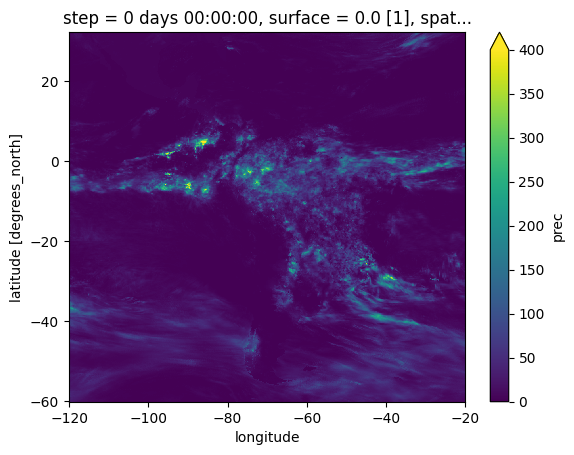

In [17]:
# To calculate the total rain in this period...
cube.sum(dim=['time']).plot(vmax=400)

## Downloading Climatology

Besides the Daily Rain, it is also possible to download <b>Climatology</b> data that refers to information about the long-term patterns and trends of climate.

The process is exacly the same as before, we just specify the data type we want. Currently the supported parsers are:



In [18]:
downloader.data_types

[<INPETypes.DAILY_RAIN: {'id': <enum.auto object at 0xffff81d0d030>, 'var': 'prec'}>,
 <INPETypes.MONTHLY_ACCUM_YEARLY: {'id': <enum.auto object at 0xffff81d0d060>, 'var': 'pacum'}>,
 <INPETypes.DAILY_AVERAGE: {'id': <enum.auto object at 0xffff81d0d090>, 'var': 'pmed'}>,
 <INPETypes.MONTHLY_ACCUM: {'id': <enum.auto object at 0xffff81254be0>, 'var': 'precacum'}>,
 <INPETypes.MONTHLY_ACCUM_MANUAL: {'id': <enum.auto object at 0xffff81254d30>, 'var': 'monthacum'}>,
 <INPETypes.YEARLY_ACCUM: {'id': <enum.auto object at 0xffff81254d90>, 'var': 'pacum'}>]

For the climatology data that is available only in monthly basis, we can specify the date with day (e.g., '20230101' or '2023-01-01'), or we can pass only the year and month (e.g., '2023-01' or '2022-04')

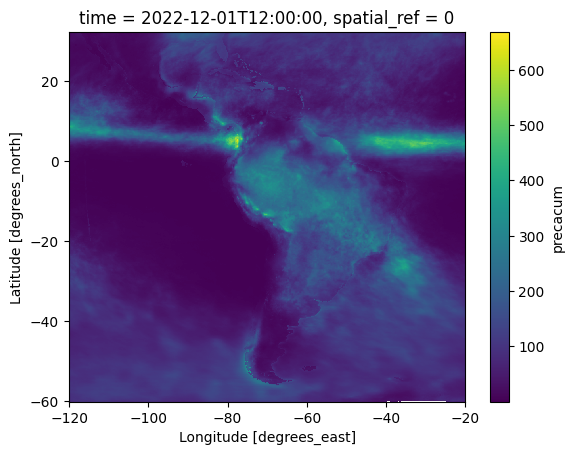

In [20]:
# Downloading the Long Term Average of december
lta = downloader.open_file('2023-12', datatype=INPETypes.MONTHLY_ACCUM)

lta.plot()

<b>Note:</b> Note that we can pass any year in the date, as we have only 12 files, one for each month. <br>

Now, let's download the rain for december 2022.

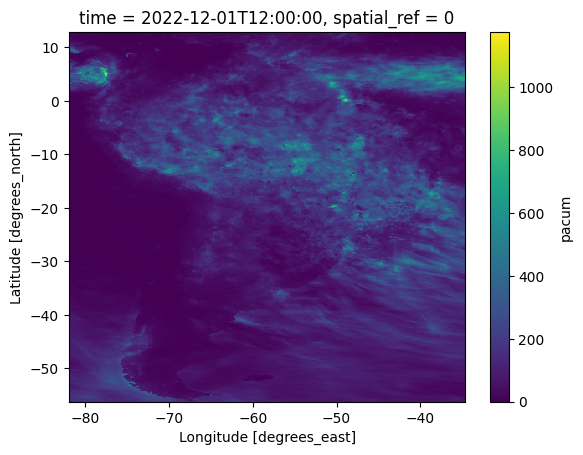

In [21]:
# Downloading the total accumulated rain for december 2022
lta = downloader.open_file('2022-12', datatype=INPETypes.MONTHLY_ACCUM_YEARLY)

lta.plot()

## Accumulating Monthly Rain Manually

We can see that in the yearly accumulated rain, the resolution is not the same. Moreover if we take a look at the source directory from INPE, the accumulated rain is not calculated for 2023 yet. 

Check `http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/`

For this scenario, our package is able to calculate the Monthly Accumulated "Manually". We just need to ask for this data type, like so:


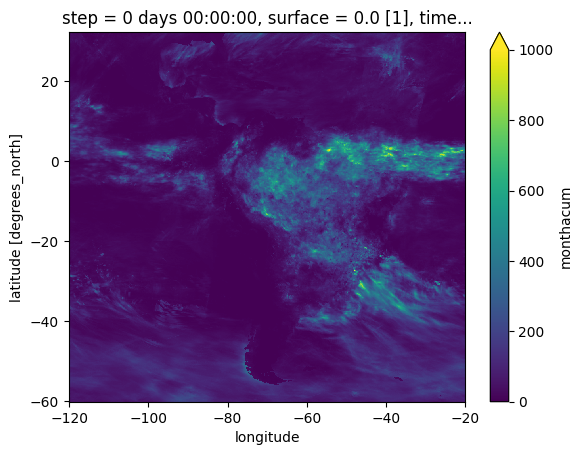

In [22]:
may = downloader.open_file('2023-02', datatype=INPETypes.MONTHLY_ACCUM_MANUAL)

may.plot(vmax=1000)

For this, we download all the Daily Rain files for the specified month and calculate total rain and save the accumulated rain raster to MONTHLY_ACCUM_MANUAL folder. 

In [3]:
from raindownloader.utils import DateProcessor, DateFrequency

In [10]:
DateProcessor.dates_range('20200101', '20210101', DateFrequency.YEARLY)

['20200101', '20210101']

In [5]:
from dateutil.relativedelta import relativedelta

In [6]:
date = DateProcessor.parse_date('20200101')
date

datetime.datetime(2020, 1, 1, 0, 0)

In [7]:
date + relativedelta(years=1)

datetime.datetime(2021, 1, 1, 0, 0)

In [1]:
from unittest.mock import MagicMock

In [2]:
ftp = MagicMock()

In [38]:
ftp.download_ftp_file.return_value='ok'

In [39]:

result = ftp.download_ftp_file(
    remote_file='remote_file_target',
    local_folder='local_file_target',
)

In [40]:
mock.assert_any_call()

<MagicMock id='281473306792176'>

In [41]:
result

'ok'

In [10]:
ftp.download_ftp_file

<MagicMock name='mock.download_ftp_file' id='281473306800768'>

In [16]:
mock = ftp.download_ftp_file

In [22]:
mock.called

True

In [25]:
call = mock.call_args

In [30]:
call.call_list()

[call(remote_file='remote_file_target', local_folder='local_file_target')]

In [32]:
mock

<MagicMock name='mock.download_ftp_file' id='281473306800768'>

In [36]:
mock.return_value

<MagicMock name='mock.download_ftp_file()' id='281473307021600'>

In [37]:
result

<MagicMock name='mock.download_ftp_file()' id='281473307021600'>

In [ ]:
is

In [33]:
result.called

False

In [35]:
result.return_value()

<MagicMock name='mock.download_ftp_file()()()' id='281473300224592'>

In [2]:
import logging 
class A:
    def __init__(self):
        self.logger = logging.getLogger(__name__)

class B(A):
    pass
    

In [3]:
a = A()
b = B()

In [4]:
b.logger.warning('teste')

teste


In [5]:
a.logger.warning('teste')


teste


In [6]:
a.__module__

'__main__'

In [7]:
dir(a)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'logger']

In [10]:
b.__class__.__qualname__

'B'

In [58]:
a.logger.name

'__main__'